<a href="https://colab.research.google.com/github/Lourdvic/AugmentedPlans/blob/master/floor_plan_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


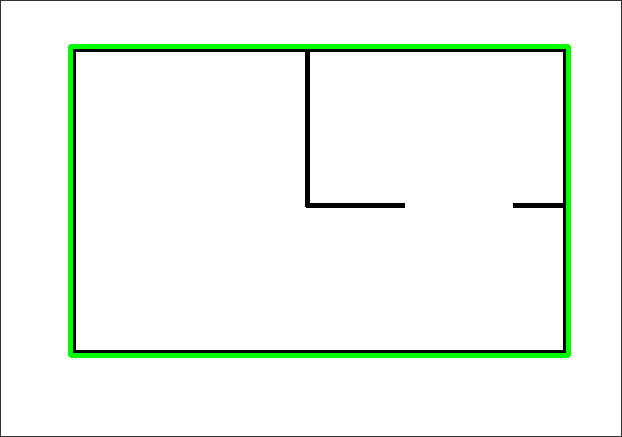

In [ ]:
import cv2
import numpy as np  
from google.colab.patches import cv2_imshow

#load image and convert to hsv
img = cv2.imread("/content/drive/MyDrive/IT projects/AP Converter/plan-simple.png")

# draw gray box around image to detect edge buildings
h,w = img.shape[:2]
cv2.rectangle(img,(0,0),(w-1,h-1), (50,50,50),1)

# convert image to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define color ranges
low_yellow = (0,28,0)
high_yellow = (27,255,255)

low_gray = (0,0,0)
high_gray = (179,255,233)

# create masks
yellow_mask = cv2.inRange(hsv, low_yellow, high_yellow )
gray_mask = cv2.inRange(hsv, low_gray, high_gray)

# combine masks
combined_mask = cv2.bitwise_or(yellow_mask, gray_mask)
kernel = np.ones((3,3), dtype=np.uint8)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_DILATE,kernel)

# findcontours
contours, hier = cv2.findContours(combined_mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# find and draw buildings
#for x in range(len(contours)):
 #       # if a contour has not contours inside of it, draw the shape filled
  #      c = hier[0][x][2]
   #     if c == -1:
    #            cv2.drawContours(img,[contours[x]],0,(0,0,255),-1)

# draw the outline of all contours
#for cnt in contours:
 #       cv2.drawContours(img,[cnt],0,(0,255,0),2)

img = cv2.drawContours(img, contours, 2, (0,255,0), 3)

# display result
cv2_imshow(img)


In [ ]:
contours[2][1]

array([[ 70, 355]], dtype=int32)

In [ ]:
contours[2][1, 0]

array([ 70, 355], dtype=int32)



```
# Ce texte est au format code
```



In [ ]:
contours[2]

array([[[ 70,  46]],

       [[ 70, 355]],

       [[568, 355]],

       [[568,  46]]], dtype=int32)

In [ ]:
contours[3][3, 0][1]

53

In [ ]:
len(contours[3])

24

In [ ]:

i = 0
for i in range(len(contours[2])):
  print(i)
  #print("x", i, " = ", contours[3][i, 0][0])
  #print("y", i, " = ", contours[3][i, 0][1])
  x1 = contours[2][i, 0][0]
  y1 = contours[2][i, 0][1]
  #print("x1 = ", contours[2][i, 0][0])
  #print("y1 = ", contours[2][i, 0][1])

  if i == 3:
    x2 = contours[2][0, 0][0]
    y2 = contours[2][0, 0][1]
    
    originX = round(x1 / 40 * 100 * 10)
    originY = round(y1 / 40 * 100 * 10)
    sizeX = round(x2 / 40 * 100 * 10) + round(x1 / 40 * 100 * 10)
    sizeY = round(y2 / 40 * 100 * 10) + round(y1 / 40 * 100 * 10)
  else:
    x2 = contours[2][i + 1 , 0][0]
    y2 = contours[2][i + 1, 0][1]
  #print("x2 = ", contours[2][i + 1, 0][0])
  #print("y2 = ", contours[2][i + 1, 0][1])

  originX = round(x1 / 40 * 100 * 10)
  originY = round(y1 / 40 * 100 * 10)

  sizeX = round(x2 / 40 * 100 * 10) - round(x1 / 40 * 100 * 10)
  sizeY = round(y2 / 40 * 100 * 10) - round(y1 / 40 * 100 * 10)
  #print("sX = ", sizeX)
  #print("sY = ", sizeY)
  print("originX = ", originX)
  print("originY = ", originY)
  print("sizeX = ", sizeX)
  print("sizeY = ", sizeY)
  print("\n")



0
originX =  1750
originY =  1150
sizeX =  0
sizeY =  7725


1
originX =  1750
originY =  8875
sizeX =  12450
sizeY =  0


2
originX =  14200
originY =  8875
sizeX =  0
sizeY =  -7725


3
originX =  14200
originY =  1150
sizeX =  -12450
sizeY =  0




In [ ]:
len(contours[2])

4

In [ ]:

for i in range(len(contours[3])):
  #print("x", i, " = ", contours[3][i, 0][0])
  #print("y", i, " = ", contours[3][i, 0][1])
  xi = contours[3][i + 1, 0][0]
  yi = contours[3][i + 1, 0][1]

IndexError: ignored

In [ ]:
import math

x0, y0 = 70, 46
x1, y1 = 70, 355
x2, y2 = 568, 355
x3, y3 = 568, 46

print(x0,y0,x1,y1)
distance = math.sqrt(((x0 - x1)**2)+((y0 - y1)**2))
distance2 = math.sqrt(((x1 - x2)**2)+((y1 - y2)**2))


70 46 70 355


distance

In [ ]:
#real dimension in cm 
# we first put the pxl distance in cm 
# then we put it at the floor plan scale here 100
# then we convert in mm

reeldim = round(((distance / 40) * 100) * 10)
reeldim

7725

In [ ]:
#write AP FILE
apfile = []
apfile.append('W00000001')


In [ ]:
cm = distance / 40 

In [ ]:
scale = cm * 100

In [ ]:
mm = scale * 10

In [ ]:
x0mm = round(x0 / 40 * 100 * 10)
y0mm = round(y0 / 40 * 100 * 10)
x1mm = round(x1 / 40 * 100 * 10)
y1mm = round(y1 / 40 * 100 * 10)
x2mm = round(x2 / 40 * 100 * 10)
y2mm = round(y2 / 40 * 100 * 10)
x3mm = round(x3 / 40 * 100 * 10)
y3mm = round(y3 / 40 * 100 * 10)

NameError: ignored